
# Project: Investigating TMDB Movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected TMDB movie data for analysis. The dataset provides information like movie cast, budget, revenue, popularity etc for over 10000 movies. I intend to use the data to answer some questions like most profitable movie each year and relation between budget, revenue and profit.

In [2]:
# all import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

I am going to clean and prepare the dataset for analysis as per the below steps.
1) Delete thye unnecessary columns
2) Find missing values and clean them
3) Identify duplicates and delete them
4) Correct the datatypes of the column headers

### General Properties

In [3]:
# Loading the dataset
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning - STEP 1 

Lets first start with removing unwanted data.


In [4]:
# This fuction provides the column names, datatypes and number of values each column holds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#this function is used to remove the columns not needed for analysis
df.drop(['id','imdb_id','tagline','keywords','overview','homepage','budget_adj','revenue_adj','production_companies','vote_count','vote_average'], axis=1,inplace=True)



Dropping the below columns as they are not needed for the analysis.
Column names:
Id,
imdb_id,
tagline,
keywords,
overview,
homepage,
budget_adj,
revenue_adj,
vote_count,
vote_average,
production_companies


In [6]:
#Preview of data after deletion
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 849.0+ KB


### Data Cleaning - STEP 2
Dealing with Duplicates. Getting the total number or duplicates and deleteing them. 

In [8]:
sum(df.duplicated())

1

In [9]:
# Drop duplicate rows but keep the first one
df.drop_duplicates(keep = 'first', inplace=True)

In [10]:
#shape gives us total number of rows and columns
df.shape

(10865, 10)

We have a total of 10864 rows after deduping and 10 columns

### Data Cleaning - STEP 3

Identifying and handling missing values.

In [11]:
df == 0
(df == 0).any()

popularity        False
budget             True
revenue            True
original_title    False
cast              False
director          False
runtime            True
genres            False
release_date      False
release_year      False
dtype: bool

In [12]:
df.columns[(df == 0).any()]

Index(['budget', 'revenue', 'runtime'], dtype='object')

Identifying colums with zero, need to now replace the 0 value with Nan

In [13]:
# Columns that have 0 values
columns = ['budget', 'revenue','runtime']
# Replace 0 with NAN
df[columns] = df[columns].replace(0, np.NaN)


In [14]:
df.isnull()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [15]:
# Drop rows with missing values
df.dropna(subset = columns, inplace = True)

In [16]:
df.shape

(3854, 10)

### Data Cleaning - STEP 4

Updating the datatypes of columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 331.2+ KB


In [18]:
df[columns] = df[columns].applymap(np.int64)
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [19]:
# Change release_date to DateTime
df.release_date = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 331.2+ KB


In [20]:
df['profit']=df['revenue']-df['budget']
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the most popular genre?

In [21]:
genres_split=pd.Series(df['genres'].str.cat(sep='|').split('|')).value_counts(ascending = False)
genres_split

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

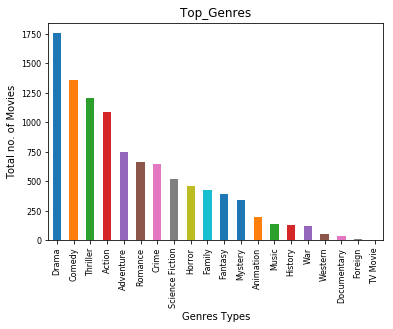

In [22]:
generes_graph = genres_split.plot.bar(fontsize = 8)
# Defining title
generes_graph.set(title = 'Top_Genres')
# defining x and y labels
generes_graph.set_xlabel('Genres Types')
generes_graph.set_ylabel('Total no. of Movies')

plt.show()

Looking at the above graph we can say that there are more number od drama movies.

### Research Question2: What is the movie with highest profit each year?

In [23]:
movies_df=df[['release_year','original_title','profit']]
movies_df.head()

,release_year,original_title,profit
0,2015,Jurassic World,1363528810
1,2015,Mad Max: Fury Road,228436354
2,2015,Insurgent,185238201
3,2015,Star Wars: The Force Awakens,1868178225
4,2015,Furious 7,1316249360


In [24]:
movies_df.shape

(3854, 3)

In [25]:
Top_movies=movies_df.groupby(['release_year'], as_index=False)['original_title','profit'].max()
Top_movies

,release_year,original_title,profit
0,1960,The Magnificent Seven,48000000
1,1961,West Side Story,211880014
2,1962,To Kill a Mockingbird,58500000
3,1963,The Great Escape,76398765
4,1964,The Night of the Iguana,121400000
5,1965,Thunderball,155014286
6,1966,Who's Afraid of Virginia Woolf?,26236689
7,1967,You Only Live Twice,201843612
8,1968,Where Eagles Dare,44715371
9,1969,The Wild Bunch,96308889


Above, is the list of movies with highest profit that year.

### Research Question 3: What is the count of movies per actor?

In [26]:
CastTotalMovies = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
CastTotalMovies.head(20)

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Tom Hanks             34
Sylvester Stallone    34
Brad Pitt             34
Morgan Freeman        34
Harrison Ford         34
Tom Cruise            33
Denzel Washington     32
Eddie Murphy          32
Liam Neeson           31
Owen Wilson           30
Julianne Moore        30
Meryl Streep          29
Gene Hackman          29
Willem Dafoe          29
dtype: int64

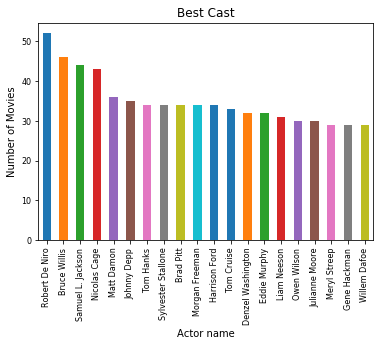

In [27]:
diagram = CastTotalMovies.head(20).plot.bar(fontsize = 8)
diagram.set(title = 'Best Cast')
# x-label and y-label
diagram.set_xlabel('Actor name')
diagram.set_ylabel('Number of Movies')
plt.show()

### Research Question 4:  Review relation between Budget, Profit vs Revenue. Is there any correlation.

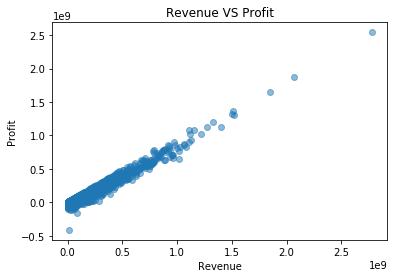

In [28]:
# x-axis
plt.xlabel('Revenue')
# y-axis
plt.ylabel('Profit')
# Title of the histogram
plt.title('Revenue VS Profit')
plt.scatter(df['revenue'], df['profit'], alpha=0.5)
plt.show()

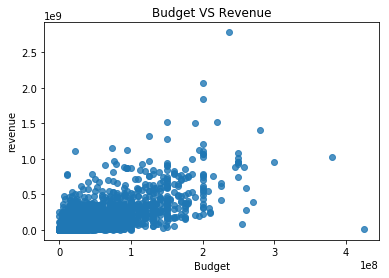

In [29]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('revenue')
# Title of the histogram
plt.title('Budget VS Revenue')
plt.scatter(df['budget'], df['revenue'], alpha=0.8)
plt.show()

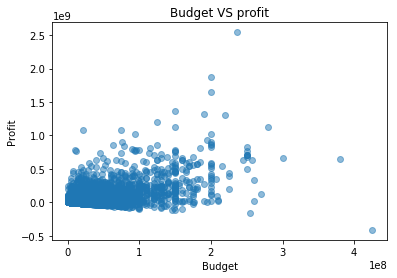

In [30]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('Profit')
# Title of the histogram
plt.title('Budget VS profit')
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.show()

### Research Question 5: Name the movie with highest popularity?

In [31]:
# df[df['popularity'].idxmax()].values
df.loc[df['popularity'] == df['popularity'].max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810


### Research Question 6: What is the most profitable movie?

In [32]:
df.loc[df['profit'] == df['profit'].max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847


<a id='conclusions'></a>
## Conclusions

So, after the analysis I have found the following:
1) Drama is the most popular genre, followed by comedy, thiller and action.
2) Jurassic World movie has the most popularity rating.
3) Avatar is the most profitable movie
4) The Top 3 cast  Robert De Niro, Bruce Willis,Samuel L. Jackson 

Analysis:
1) The relationship between revenue and profit is linear. Higher profir leads to higher revenue
2) Most of the movies with Budget upto 100 M dollars have profit close to 50 M dollars.
3) Most of the movies have Revenue upto 50M dollars



Limitations:

we have only worked on 30% of the data so the conclusions may vary with larger dataset.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0